# Model selection: choosing estimators and their parameters¶


## Score, and cross-validated scores

score evaluates the quality of fit (or the prediction) on new data.

In [1]:
from sklearn import datasets, svm
X_digits, y_digits = datasets.load_digits(return_X_y=True)
svc = svm.SVC(C=1, kernel='linear')
# Entrena el modelo con todos los datos menos los últimos 100, y evalúa en los últimos 100
svc.fit(X_digits[:-100], y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])


0.98

### KFold cross validation

A way to obtain a better measure of accuracy is to split the data in folds to subsequently train and test on each of these folds.

In [2]:
import numpy as np
X_folds = np.array_split(X_digits, 3) # Split the data into 3 (almost) equal parts
y_folds = np.array_split(y_digits, 3)
scores = list() # Initialize empty list

for k in range(3): # Por cada fold k
    X_train = list(X_folds) # Copia de la lista de folds
    X_test = X_train.pop(k) # Extrae el elemento en la posición 'k' actual y se usará como segmento prueba
    X_train = np.concatenate(X_train) # concatena los elementos restantes para formar el segmento de entrenamiento
    # Se repiten los pasos para las etiquetas
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    # Se entrena el modelo y se evalúa
    scores.append(svc.fit(X_train, y_train).score(X_test, y_test))  
print(scores)


[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]


## Cross-validation generators
Tools that generate indices to efficiently split the data according to several cross-validation strategies.

### Split Method: 

Se utiliza un objeto KFold con K de 5, y se imprimen los índices para ver cómo se generan los splits para el training set de cada fold.

In [3]:
from sklearn.model_selection import KFold, cross_val_score
X = ["a", "a", "a", "b", "b", "c", "c", "c", "c", "c"]
k_fold = KFold(n_splits=5) # Create KFold object set to split into 5 groups. 
# This object creates index pairs which will be assigned in the next for loop

# for every group created by the KFold object, print the indices
for train_indices, test_indices in k_fold.split(X): 
    print("Train: %s | test: %s" % (train_indices, test_indices))

Train: [2 3 4 5 6 7 8 9] | test: [0 1]
Train: [0 1 4 5 6 7 8 9] | test: [2 3]
Train: [0 1 2 3 6 7 8 9] | test: [4 5]
Train: [0 1 2 3 4 5 8 9] | test: [6 7]
Train: [0 1 2 3 4 5 6 7] | test: [8 9]


Al aplicarlo al dataset digits:

se hace un for loop con k_fold split, asignando valores a los índices.  Después, en cada loop se dividen los datos de entrenamiento y prueba, se hace el fit y se guarda el score en la lista scores

In [4]:
k_fold = KFold(n_splits=5)
scores = []

for train_index, test_index in k_fold.split(X_digits):
    X_train, X_test = X_digits[train_index], X_digits[test_index]
    y_train, y_test = y_digits[train_index], y_digits[test_index]

    svc.fit(X_train, y_train)

    score = svc.score(X_test, y_test)
    scores.append(score)

print(scores)

[0.9638888888888889, 0.9222222222222223, 0.9637883008356546, 0.9637883008356546, 0.9303621169916435]


Ninja programmer:

In [5]:
[svc.fit(X_digits[train], y_digits[train]).score(X_digits[test], y_digits[test])
 for train, test in k_fold.split(X_digits)]

[0.9638888888888889,
 0.9222222222222223,
 0.9637883008356546,
 0.9637883008356546,
 0.9303621169916435]

cross_val_score helper

recibe como argumentos un estimador (svc = SVC()), el dataset (X_digits, y_digits) y el cross-validation object (k_fold = KFold(n_splits=5). 

Hace lo mismo que lo escrito anteriormente, pero de forma más compacta y eficiente. Elimina la necesidad de bucles explícitos y permite el entrenamiento y evaluación en paralelo con n_jobs

Comento las líneas que ya fueron definidas antes.



In [6]:
# from sklearn.model_selection import cross_val_score
# from sklearn.svm import SVC
# from sklearn.model_selection import KFold

# # Preparar los datos de entrada y las etiquetas
# X_digits = # (asigna aquí tus datos de características)
# y_digits = # (asigna aquí tus etiquetas correspondientes)

# # Configurar la validación cruzada
# k_fold = KFold(n_splits=5)  # Dividir los datos en 5 partes

# # Crear una instancia del clasificador
# svc = SVC()

# Calcular los puntajes de validación cruzada
scores = cross_val_score(svc, X_digits, y_digits, cv=k_fold, n_jobs=-1)

# Imprimir los puntajes obtenidos
print(scores)


[0.96388889 0.92222222 0.9637883  0.9637883  0.93036212]


El scoring argument puede editarse para cambiar la métrica de evaluación. Por defecto, el score es el accuracy.

In [7]:
cross_val_score(svc, X_digits, y_digits, cv=k_fold, scoring='precision_macro')

array([0.96578289, 0.92708922, 0.96681476, 0.96362897, 0.93192644])

#### Exercise

On the digits dataset, plot the cross-validation score of a SVC estimator with a linear kernel as a function of parameter C (use a logarithmic grid of points, from 1 to 10).

C:  1e-10
C:  1.2618568830660183e-10
C:  1.592282793341094e-10
C:  2.0092330025650458e-10
C:  2.5353644939701164e-10
C:  3.1992671377973845e-10
C:  4.03701725859655e-10
C:  5.094138014816385e-10
C:  6.428073117284319e-10
C:  8.111308307896856e-10
C:  1.0235310218990269e-09
C:  1.2915496650148826e-09
C:  1.6297508346206469e-09
C:  2.0565123083486515e-09
C:  2.595024211399732e-09
C:  3.2745491628777316e-09
C:  4.132012400115335e-09
C:  5.214008287999674e-09
C:  6.579332246575682e-09
C:  8.302175681319736e-09
C:  1.0476157527896662e-08
C:  1.3219411484660288e-08
C:  1.6681005372000592e-08
C:  2.104904144512022e-08
C:  2.656087782946684e-08
C:  3.351602650938841e-08
C:  4.229242874389499e-08
C:  5.336699231206302e-08
C:  6.734150657750828e-08
C:  8.497534359086438e-08
C:  1.0722672220103232e-07
C:  1.3530477745798075e-07
C:  1.7073526474706888e-07
C:  2.1544346900318867e-07
C:  2.71858824273294e-07
C:  3.4304692863149193e-07
C:  4.3287612810830616e-07
C:  5.462277217684337e-07
C:  6.892612

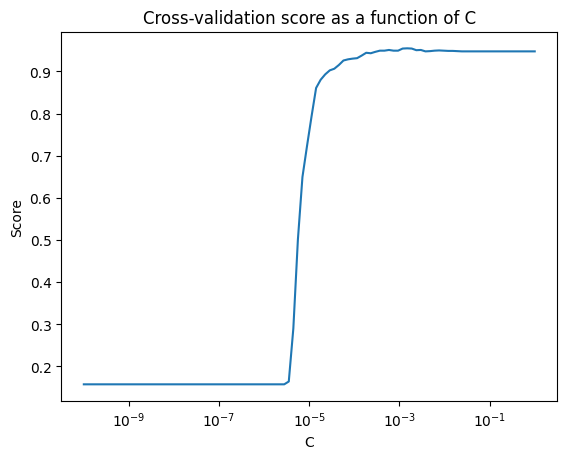

In [17]:
"""
On the digits dataset, plot the cross-validation score of a SVC estimator with a linear kernel 
as a function of parameter C (use a logarithmic grid of points, from 1 to 10).
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn import datasets, svm

# Load dataset
X_digits, y_digits = datasets.load_digits(return_X_y=True)

# Define logspace range for C parameter
C_range = np.logspace(-10, -0, 100)  

# Initialize SVC estimator
svc = svm.SVC(kernel="linear")
# 
# For each value of C in the logspace range, calculate the cross-validation score with cross_val_score function
scores = []
for C in C_range:
    print("C: ", C)
    svc.C = C
    this_scores = cross_val_score(svc, X_digits, y_digits, n_jobs=-1)
    scores.append(np.mean(this_scores))

# Print the scores
print(scores)



# Plot the cross-validation scores as a function of C
plt.figure()
plt.xlabel("C")
plt.ylabel("Score")
plt.title("Cross-validation score as a function of C")
plt.plot(C_range, scores)
plt.xscale("log")
plt.show()




We can see the values change at values between 10^-4.5 and 10^5.5